# Pyramids via custom resampling methods

In this example, we'll show how to use `pyramid_create` to generate multi-scale pyramids using a custom resampling method.

In [1]:
import dask  # noqa
import datatree
import xarray as xr

from ndpyramid import pyramid_create

## Setup output paths

You can set the output path to object storage or a memory store, after changing the S3 URI to a location that you have write access to. 


In [2]:
S3 = False
if S3:
    output = "s3://carbonplan-scratch/pyramid_comparison/custom.zarr"
else:
    import zarr

    output = zarr.storage.MemoryStore()

## Open input dataset
 
In this example, we'll use the Xarray tutorial dataset `air_temperature`.

In [3]:
ds = xr.tutorial.load_dataset('air_temperature')

## Generate pyramids

We'll use the `pyramid_create` function to generate a pyramid with two levels. This function can be used to apply a provided function to the dataset to create the individual pyramid levels.

In [4]:
def sel_coarsen(ds, factor, dims, **kwargs):
    return ds.sel(**{dim: slice(None, None, factor) for dim in dims})


factors = [4, 2, 1]
pyramid = pyramid_create(
    ds,
    dims=('lat', 'lon'),
    factors=factors,
    boundary='trim',
    func=sel_coarsen,
    method_label="slice_coarsen",
    type_label='pick',
)
pyramid.to_zarr(output, consolidated=True, mode='w')

/Users/max/mambaforge/envs/ndpyramid-docs/lib/python3.10/site-packages/xarray/core/dataset.py:2549: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/Users/max/mambaforge/envs/ndpyramid-docs/lib/python3.10/site-packages/xarray/core/dataset.py:2549: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/Users/max/mambaforge/envs/ndpyramid-docs/lib/python3.10/site-packages/xarray/core/dataset.py:2549: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


## Open and plot the result


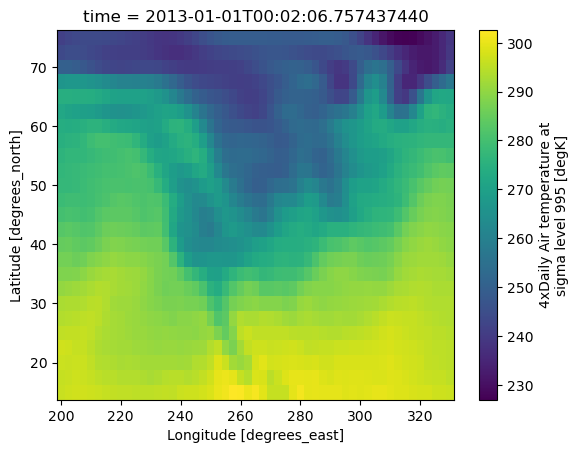

In [14]:
dt = datatree.open_datatree(output, engine="zarr")
dt["2"].ds.isel(time=0).air.plot()